#new

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
file_path = '/content/drive/MyDrive/new_health_encoded.csv'
df = pd.read_csv(file_path)
# Preprocess the data
data = df.drop(columns=['Unnamed: 0', 'National Provider Identifier', 'HCPCS Code', 'Full Name'])
x_train = data.values.astype('float32')

x_train = (x_train - np.min(x_train, axis=0)) / (np.max(x_train, axis=0) - np.min(x_train, axis=0))

input_dim = x_train.shape[1]
encoding_dim = 32
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #Import tensorflow here
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
df = pd.read_csv(file_path)
# Preprocess the data
data = df.drop(columns=['Unnamed: 0', 'National Provider Identifier', 'HCPCS Code', 'Full Name'])
x_train = data.values.astype('float32')

# Normalize the data
x_train = (x_train - np.min(x_train, axis=0)) / (np.max(x_train, axis=0) - np.min(x_train, axis=0))

input_dim = x_train.shape[1]
BATCH_SIZE = 256
EPOCHS = 100


autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

autoencoder.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 25)                650       
                                                                 
 dense_89 (Dense)            (None, 16)                416       
                                                                 
 dense_90 (Dense)            (None, 8)                 136       
                                                                 
 dense_91 (Dense)            (None, 4)                 36        
                                                                 
 dense_92 (Dense)            (None, 2)                 10        
                                                                 
 dense_93 (Dense)            (None, 4)                 12        
                                                                 
 dense_94 (Dense)            (None, 8)                

In [ ]:

X_train, X_test = train_test_split(df.drop(columns=['Unnamed: 0', 'National Provider Identifier', 'HCPCS Code', 'Full Name']), test_size=0.2, random_state=42)
X_train = X_train.values.astype('float32')
X_test = X_test.values.astype('float32')

X_train = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))

input_dim = X_train.shape[1]

encoding_dim = 16
# Calculate the hidden dimensions
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = int(encoding_dim / 2)
hidden_dim3 = int(encoding_dim / 2)
input_layer = Input (shape=(input_dim,))

encoder = Dense (encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5)) (input_layer)
encoder = Dense (hidden_dim1, activation='relu') (encoder)
encoder = Dense (hidden_dim2, activation='relu') (encoder)
encoder = Dense (hidden_dim3, activation='relu') (encoder)
encoder = Dropout (0.2) (encoder)
# Define the decoding layers
decoder = Dense (hidden_dim2, activation='relu') (encoder)
decoder = Dense (hidden_dim1, activation='relu') (decoder)
decoder = Dense (encoding_dim, activation='relu') (decoder)
decoder = Dense (input_dim, activation='sigmoid') (decoder)
autoencoder = Model (inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder (you might want to adjust epochs and batch size)
autoencoder.fit(X_train, X_train, epochs=150, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Now use the newly defined and trained autoencoder
reconstructed_data = autoencoder.predict(X_train)

<ipython-input-80-858134b52527>:6: RuntimeWarning: invalid value encountered in divide
  X_test = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))


Epoch 1/150
313/313 [==============================] - 3s 3ms/step - loss: 0.0895 - val_loss: nan
Epoch 2/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0415 - val_loss: nan
Epoch 3/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - val_loss: nan
Epoch 4/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - val_loss: nan
Epoch 5/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0263 - val_loss: nan
Epoch 6/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0249 - val_loss: nan
Epoch 7/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0239 - val_loss: nan
Epoch 8/150
313/313 [==============================] - 1s 3ms/step - loss: 0.0234 - val_loss: nan
Epoch 9/150
313/313 [==============================] - 1s 5ms/step - loss: 0.0228 - val_loss: nan
Epoch 10/150
313/313 [==============================] - 1s 4ms/step - loss: 0.0223 - val_loss: nan
Epoch 11/150
313/31

2500/2500 [==============================] - 10s 4ms/step


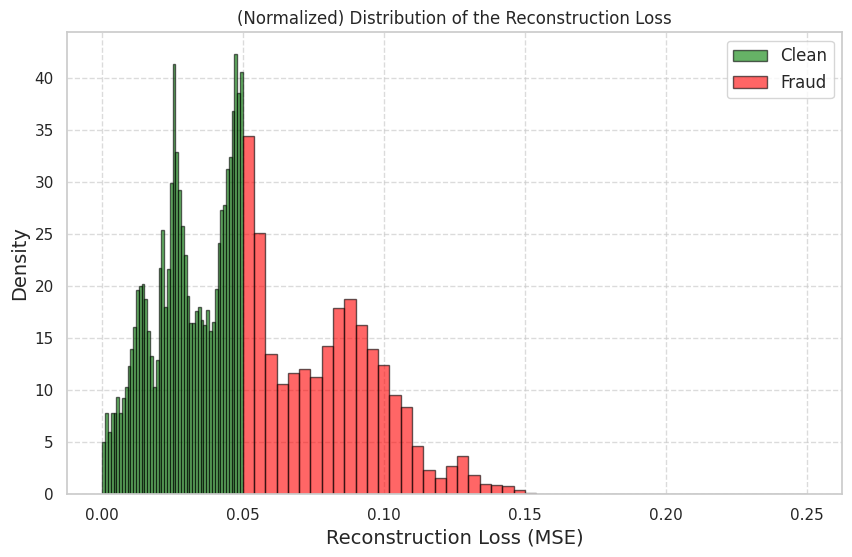

In [126]:
reconstructed_data = autoencoder.predict(X_train)

mse = np.mean(np.power(X_train - reconstructed_data, 2), axis=1)
threshold = 0.05
clean = mse[mse < threshold]
fraud = mse[mse >= threshold]

# Plot the distribution of the reconstruction loss
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(clean, bins=50, density=True, label="Clean", alpha=0.6, color="green", edgecolor='black')
ax.hist(fraud, bins=50, density=True, label="Fraud", alpha=0.6, color="red", edgecolor='black')

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction Loss (MSE)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

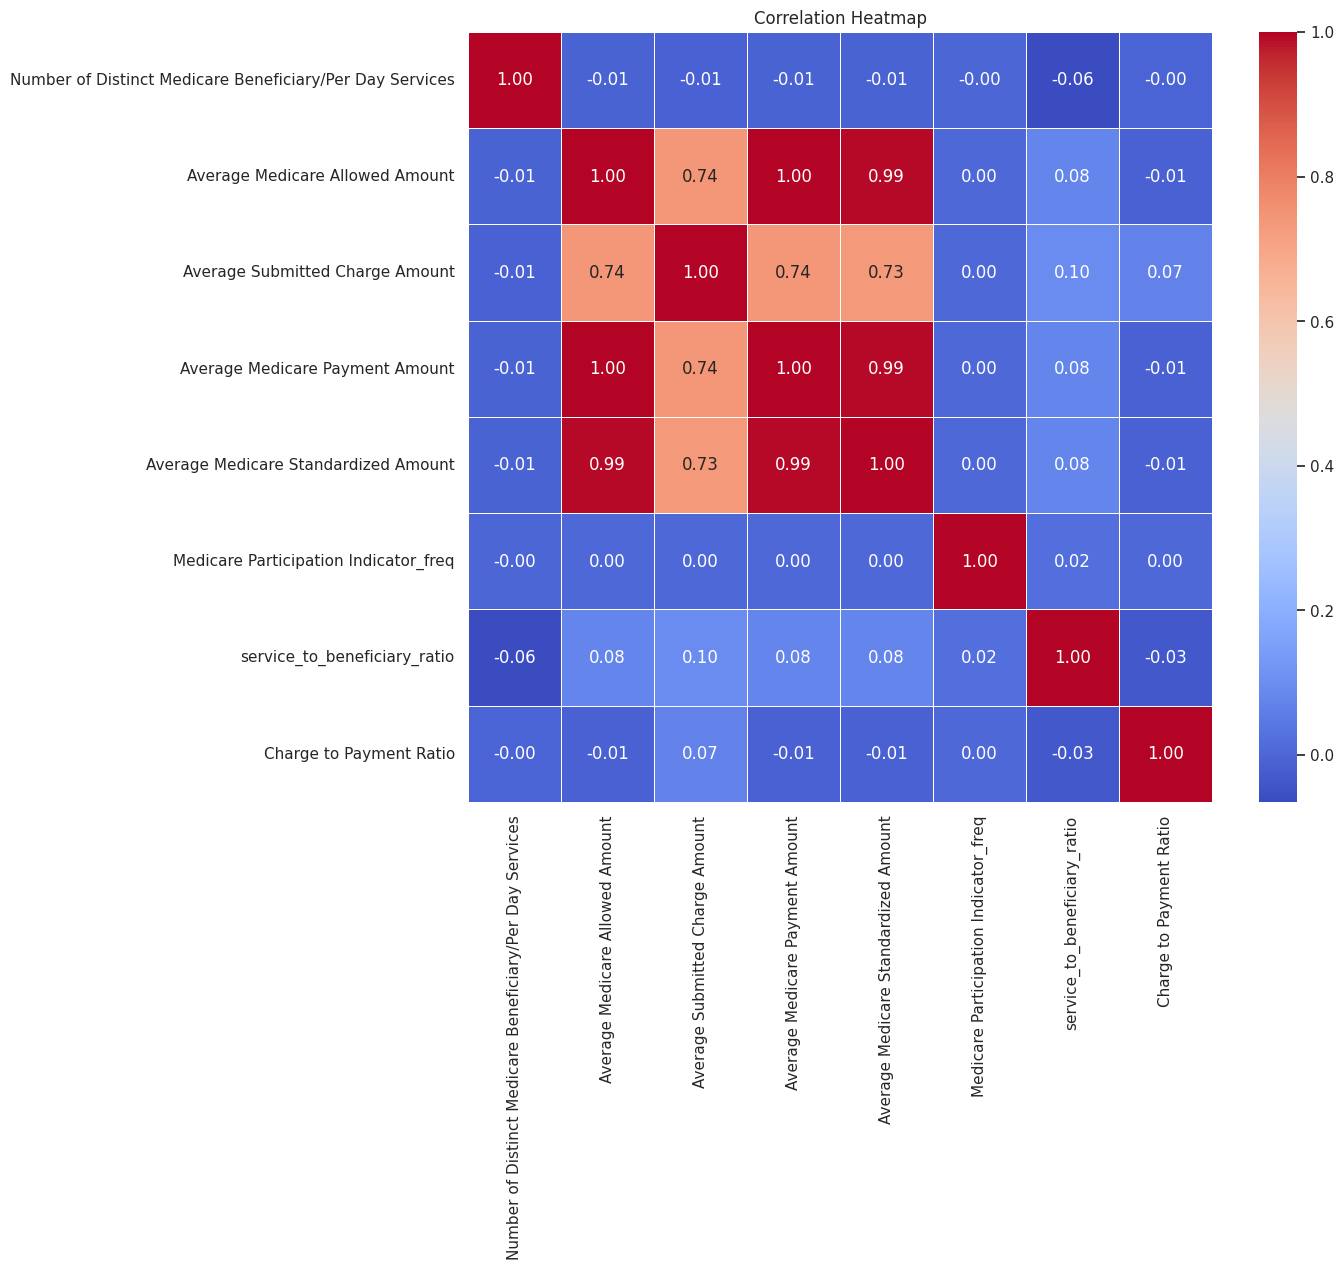

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the columns you mentioned
columns_for_heatmap = ['Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount',
       'Medicare Participation Indicator_freq',
       'service_to_beneficiary_ratio', 'Charge to Payment Ratio',]

# Subset the DataFrame for the heatmap
df_heatmap = df[columns_for_heatmap]

# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-103-7a80ac68284b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df_provider, x='Provider Type_freq', palette='viridis')


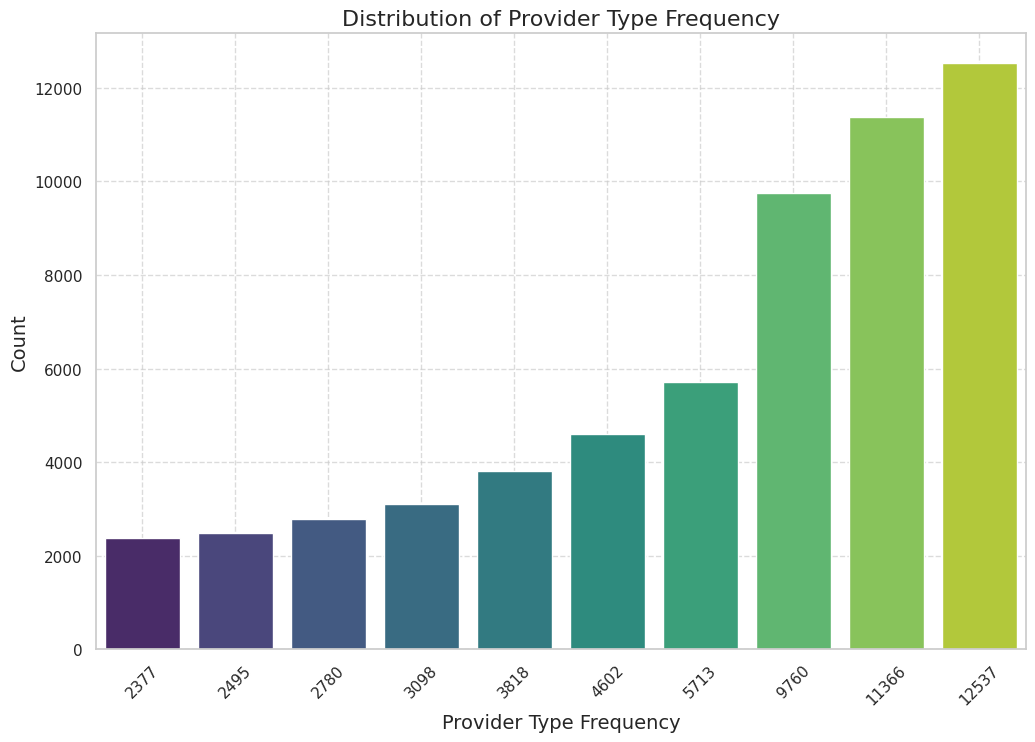

<ipython-input-103-7a80ac68284b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df_state, x='State Code of the Provider_freq', palette='viridis')


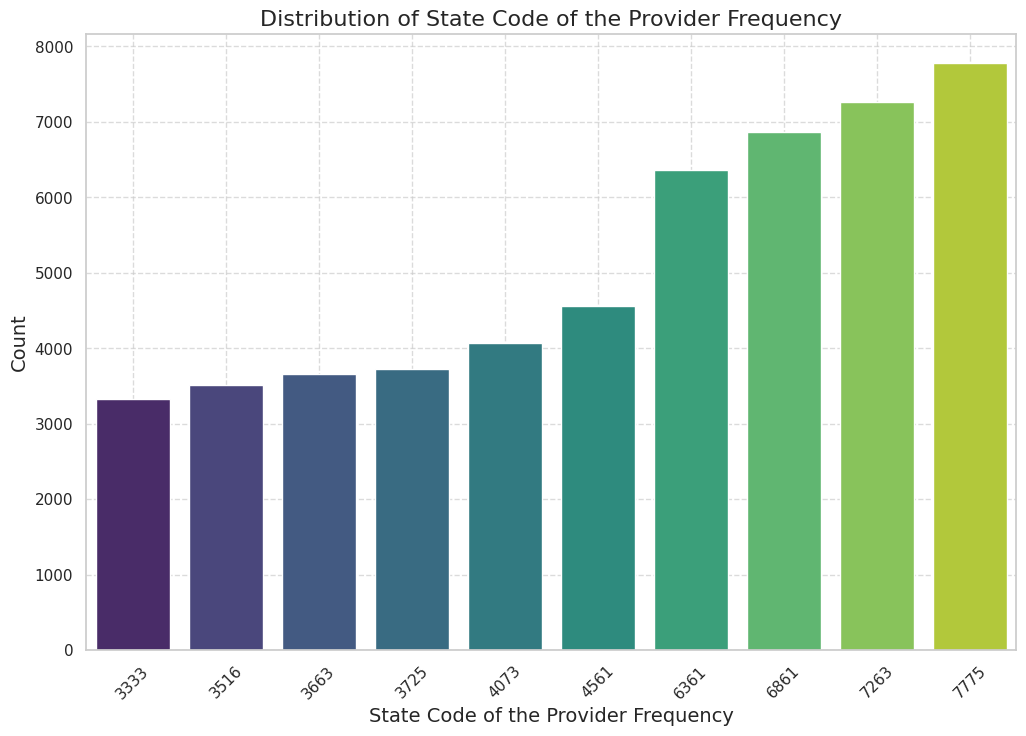

done


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/new_health.csv', encoding='ascii')

# Sample a subset of the data to avoid merging on the x-axis
sampled_df_provider = df['Provider Type_freq'].value_counts().nlargest(10).index
sampled_df_state = df['State Code of the Provider_freq'].value_counts().nlargest(10).index

# Filter the dataframe
filtered_df_provider = df[df['Provider Type_freq'].isin(sampled_df_provider)]
filtered_df_state = df[df['State Code of the Provider_freq'].isin(sampled_df_state)]

# Visualization for 'Provider Type_freq'
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df_provider, x='Provider Type_freq', palette='viridis')
plt.title('Distribution of Provider Type Frequency', fontsize=16)
plt.xlabel('Provider Type Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization for 'State Code of the Provider_freq'
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df_state, x='State Code of the Provider_freq', palette='viridis')
plt.title('Distribution of State Code of the Provider Frequency', fontsize=16)
plt.xlabel('State Code of the Provider Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print('done')

<ipython-input-105-33f442cc1841>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credentials of the Provider_freq', palette="viridis")


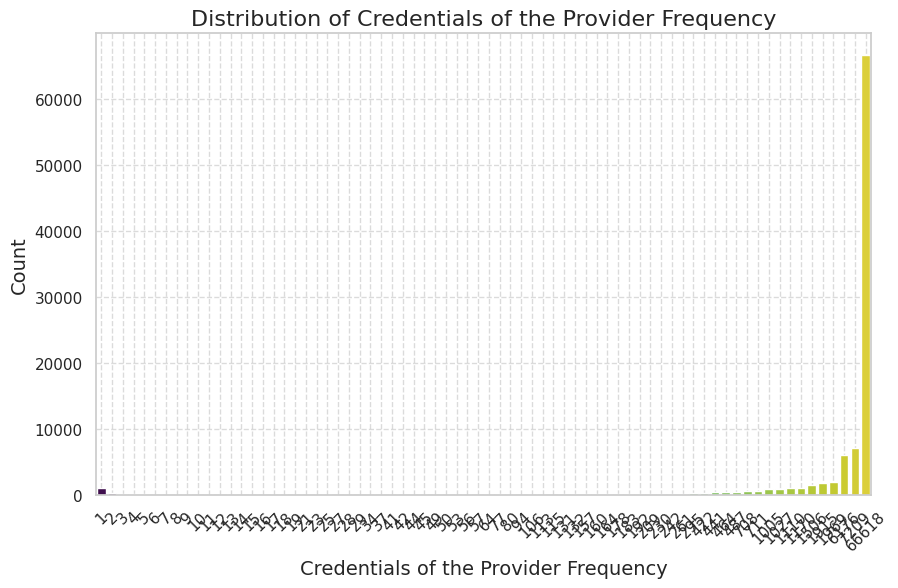

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credentials of the Provider_freq', palette="viridis")
plt.title('Distribution of Credentials of the Provider Frequency', fontsize=16)
plt.xlabel('Credentials of the Provider Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-106-700196382eb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender of the Provider_freq', palette="viridis")


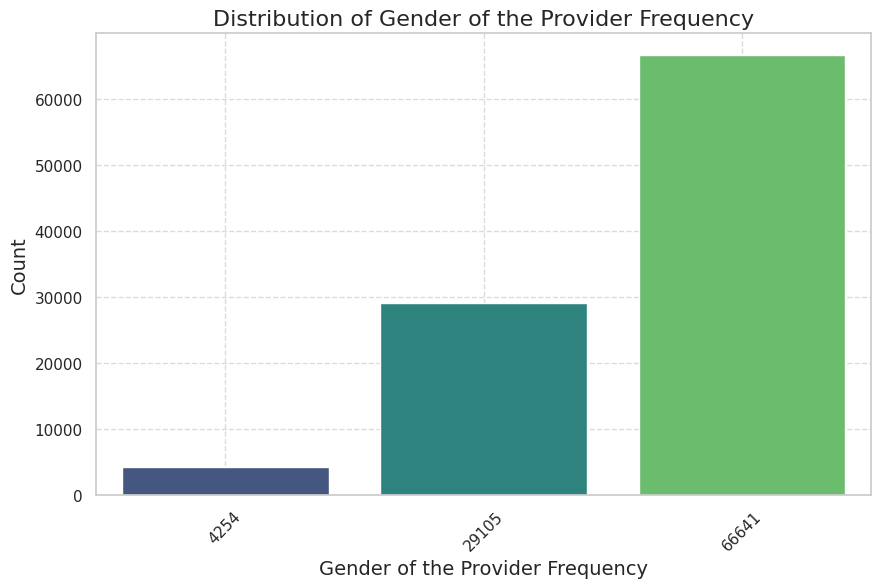

<ipython-input-106-700196382eb9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country Code of the Provider_freq', palette="viridis")


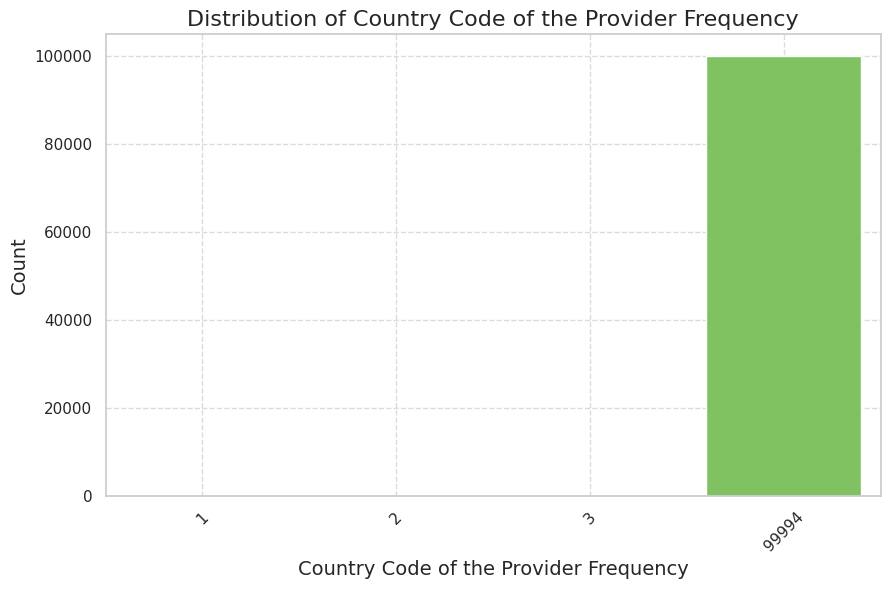

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender of the Provider_freq', palette="viridis")
plt.title('Distribution of Gender of the Provider Frequency', fontsize=16)
plt.xlabel('Gender of the Provider Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization for 'Country Code of the Provider_freq'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country Code of the Provider_freq', palette="viridis")
plt.title('Distribution of Country Code of the Provider Frequency', fontsize=16)
plt.xlabel('Country Code of the Provider Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-107-bb945711f7d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Medicare Participation Indicator_freq', palette="viridis")


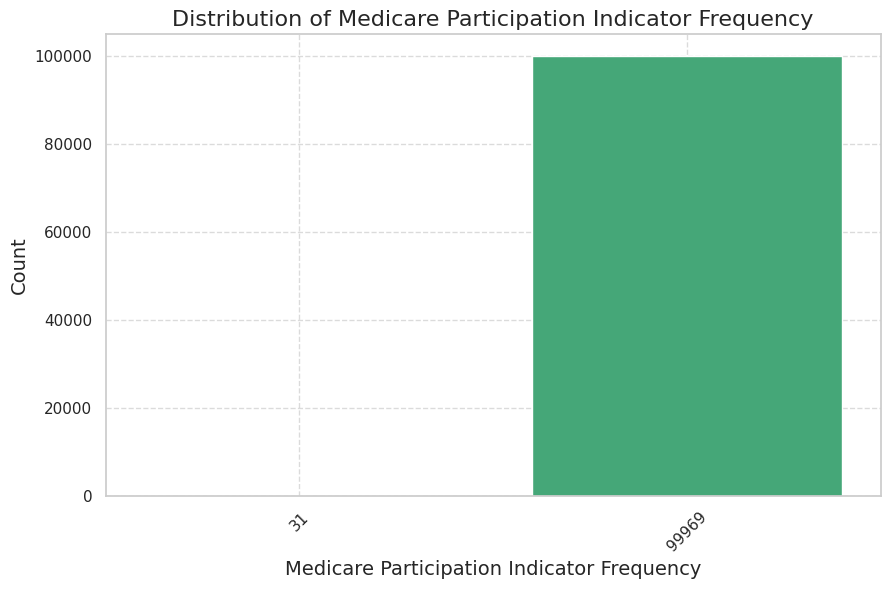

<ipython-input-107-bb945711f7d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Place of Service_freq', palette="viridis")


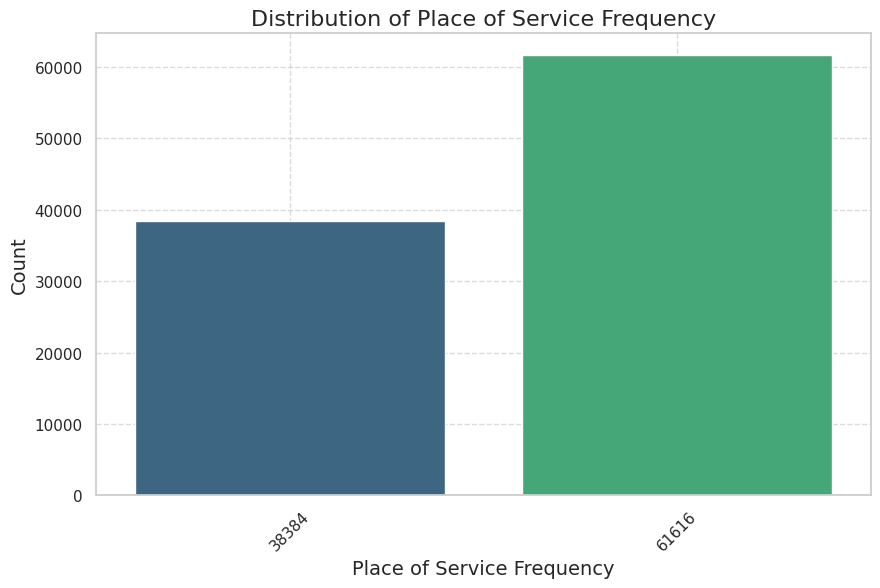

In [107]:


# Visualization for 'Medicare Participation Indicator_freq'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medicare Participation Indicator_freq', palette="viridis")
plt.title('Distribution of Medicare Participation Indicator Frequency', fontsize=16)
plt.xlabel('Medicare Participation Indicator Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization for 'Place of Service_freq'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Place of Service_freq', palette="viridis")
plt.title('Distribution of Place of Service Frequency', fontsize=16)
plt.xlabel('Place of Service Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


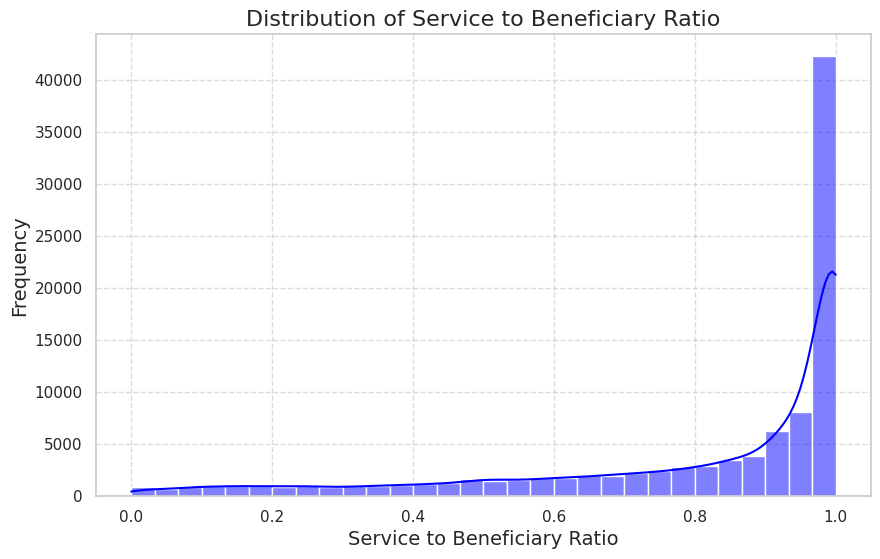

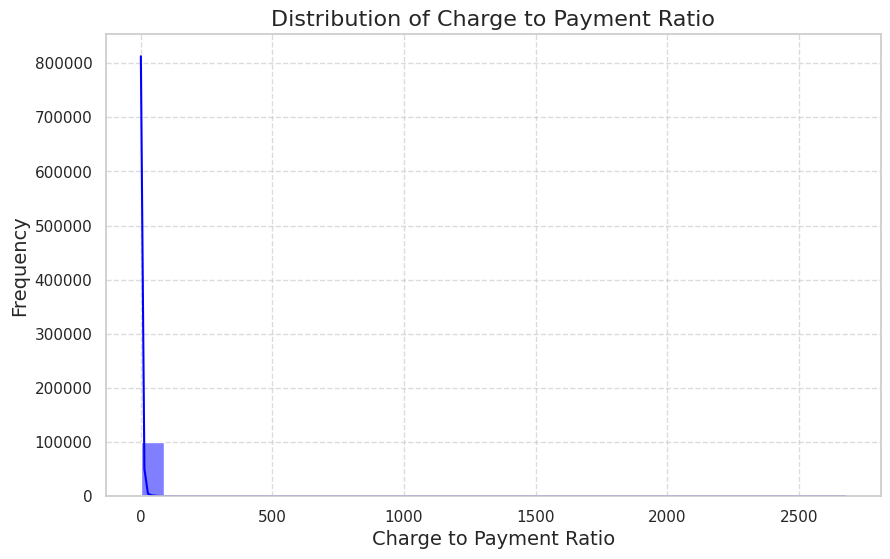

In [108]:

# Visualization for 'service_to_beneficiary_ratio'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='service_to_beneficiary_ratio', bins=30, kde=True, color="blue")
plt.title('Distribution of Service to Beneficiary Ratio', fontsize=16)
plt.xlabel('Service to Beneficiary Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization for 'Charge to Payment Ratio'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Charge to Payment Ratio', bins=30, kde=True, color="blue")
plt.title('Distribution of Charge to Payment Ratio', fontsize=16)
plt.xlabel('Charge to Payment Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

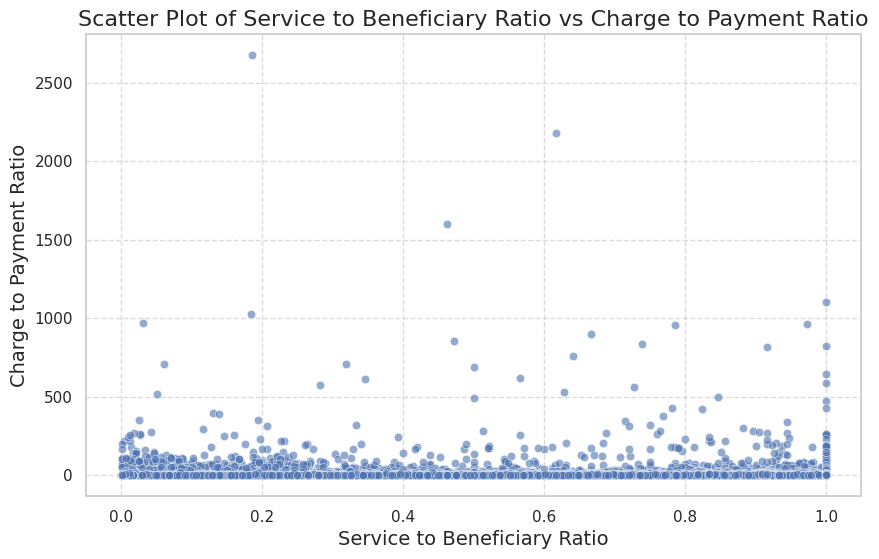

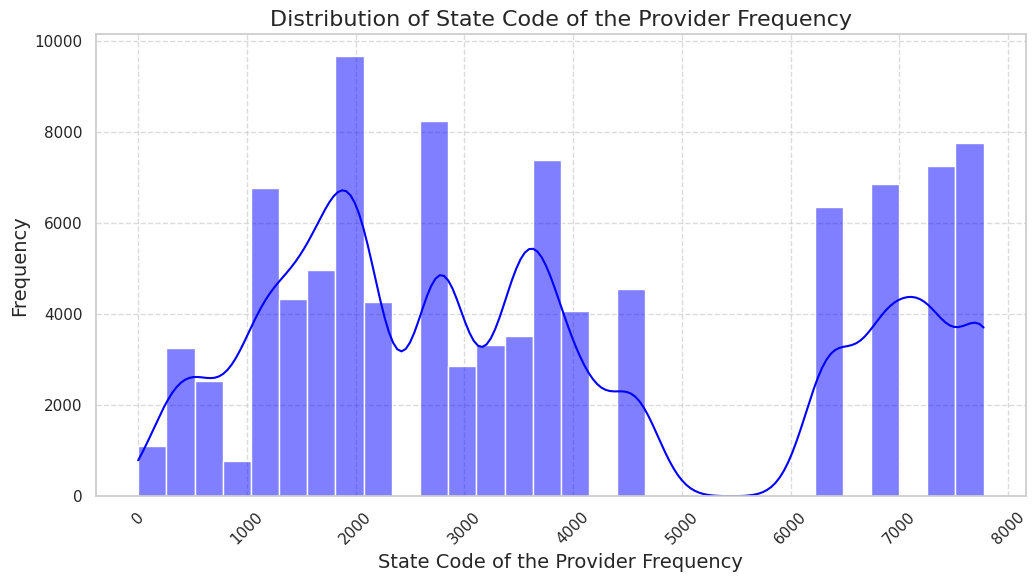

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='service_to_beneficiary_ratio', y='Charge to Payment Ratio', alpha=0.6)
plt.title('Scatter Plot of Service to Beneficiary Ratio vs Charge to Payment Ratio', fontsize=16)
plt.xlabel('Service to Beneficiary Ratio', fontsize=14)
plt.ylabel('Charge to Payment Ratio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='State Code of the Provider_freq', bins=30, kde=True, color="blue")
plt.title('Distribution of State Code of the Provider Frequency', fontsize=16)
plt.xlabel('State Code of the Provider Frequency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

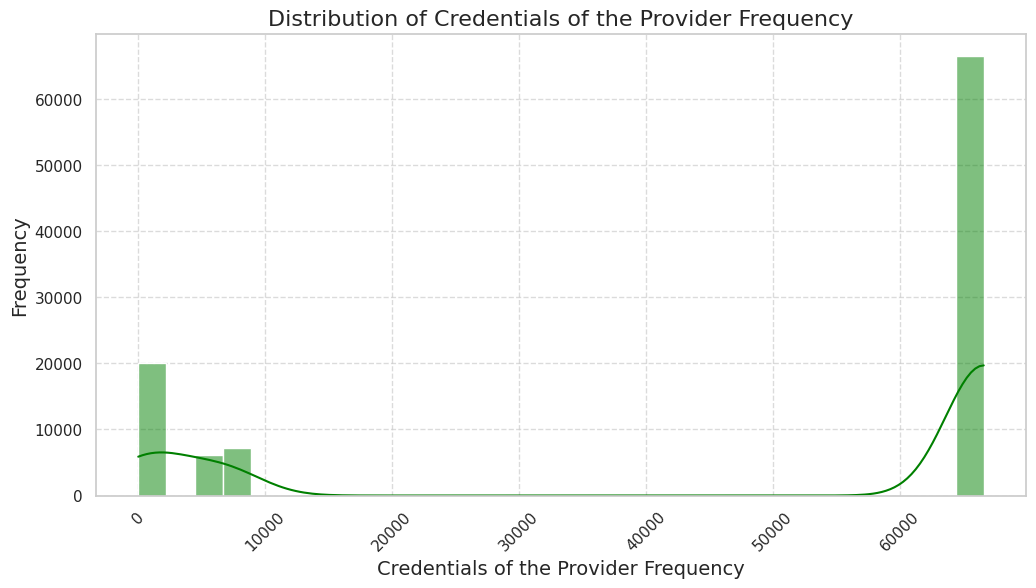

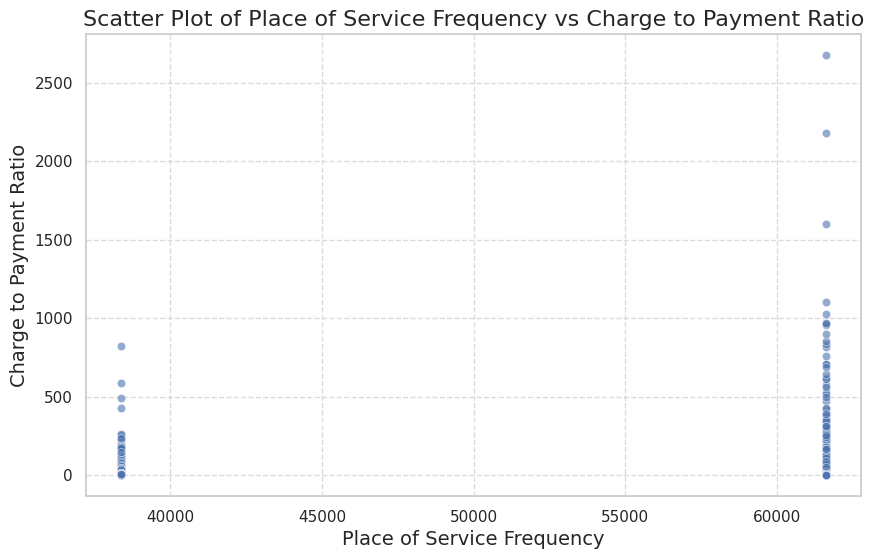

In [112]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Credentials of the Provider_freq', bins=30, kde=True, color="green")
plt.title('Distribution of Credentials of the Provider Frequency', fontsize=16)
plt.xlabel('Credentials of the Provider Frequency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Place of Service_freq', y='Charge to Payment Ratio', alpha=0.6)
plt.title('Scatter Plot of Place of Service Frequency vs Charge to Payment Ratio', fontsize=16)
plt.xlabel('Place of Service Frequency', fontsize=14)
plt.ylabel('Charge to Payment Ratio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


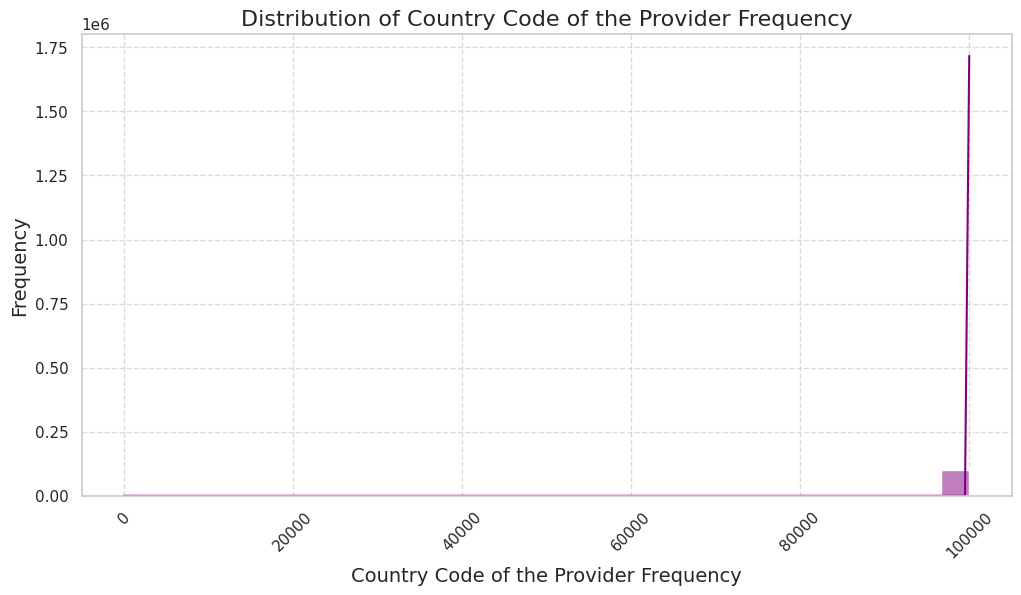

<ipython-input-113-4fabb34d9c68>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Medicare Participation Indicator_freq', y='service_to_beneficiary_ratio', palette="viridis")


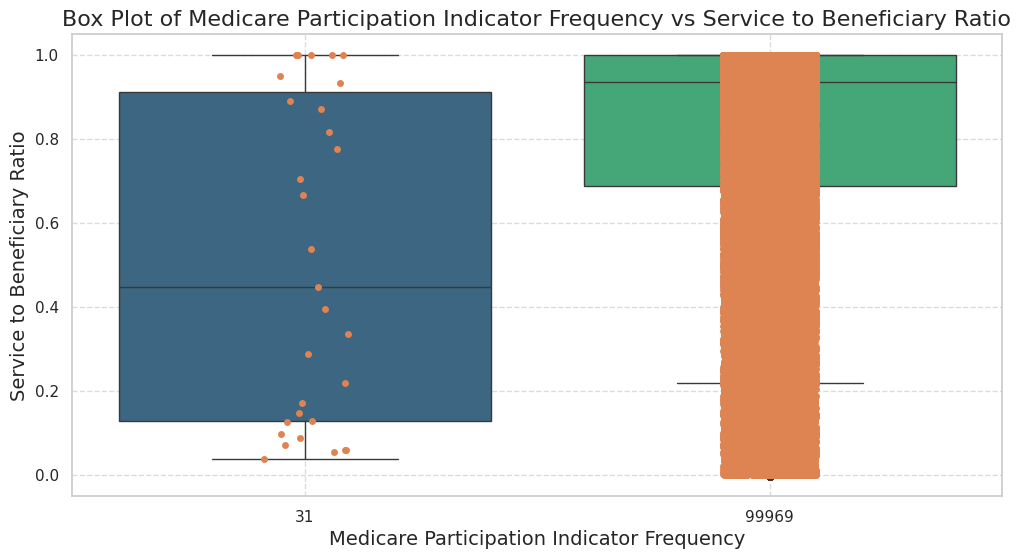

In [113]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Country Code of the Provider_freq', bins=30, kde=True, color="purple")
plt.title('Distribution of Country Code of the Provider Frequency', fontsize=16)
plt.xlabel('Country Code of the Provider Frequency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




<ipython-input-114-b6c86a512db8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Medicare Participation Indicator_freq', y='service_to_beneficiary_ratio', palette="viridis")


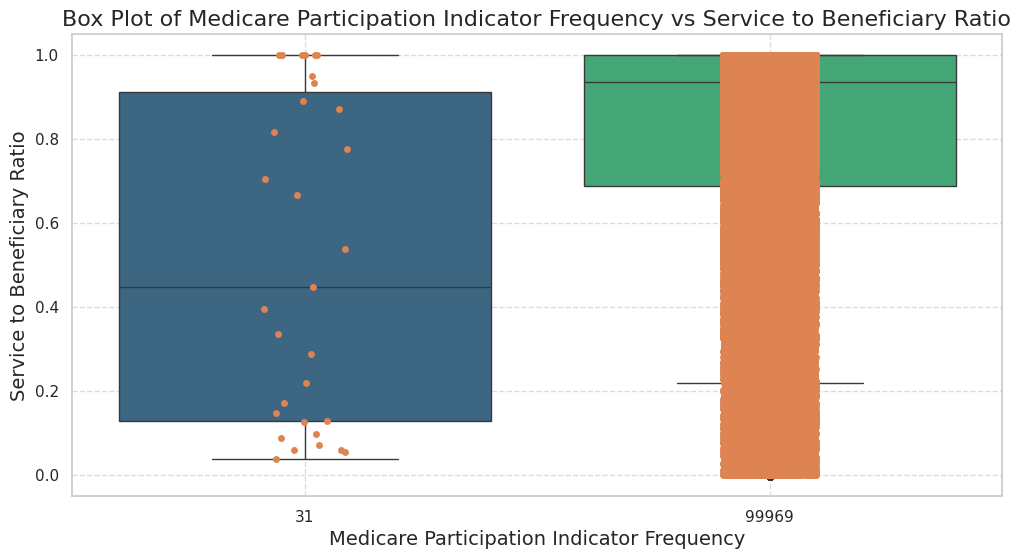

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Medicare Participation Indicator_freq', y='service_to_beneficiary_ratio', palette="viridis")
sns.stripplot(data=df, x='Medicare Participation Indicator_freq', y='service_to_beneficiary_ratio')
plt.title('Box Plot of Medicare Participation Indicator Frequency vs Service to Beneficiary Ratio', fontsize=16)
plt.xlabel('Medicare Participation Indicator Frequency', fontsize=14)
plt.ylabel('Service to Beneficiary Ratio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

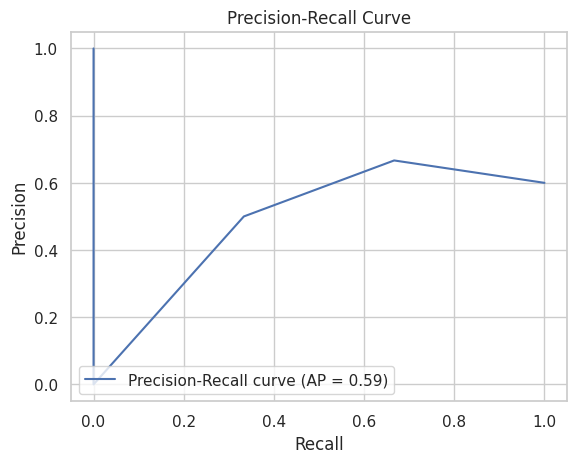

Area under the precision-recall curve: 0.4888888888888889


In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

y_test = [0, 1, 1, 0, 1]
mse = [0.1, 0.3, 0.2, 0.4, 0.1]

# Assuming 'y_test' contains the true labels and 'mse' contains the reconstruction errors
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Calculate average precision score
average_precision = average_precision_score(y_test, mse)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate area under the precision-recall curve
area_under_curve = auc(recall, precision)
print("Area under the precision-recall curve:", area_under_curve)